<a href="https://colab.research.google.com/github/123bhawna/Portfolio/blob/main/Bhawna_midsem_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random 
import numpy as np

In [38]:
# step 1 - 1000 draws from uniform distribution of [20, 70]
X = np.random.uniform(20.0, 70.0, 1000)
X[2]

21.072376720474043

In [39]:
# step 2 - 1000 draws from normal distribution, mean = 0, var = 25
mu = 0
std = 25
epsilon = np.random.normal(mu, std, 1000)
epsilon[2]

13.620916699846392

In [40]:
# step 3 - creating Yi values, beta0 = 10, beta1 = 2
beta0 = 10
beta1 = 2
Y = beta0 + beta1*X + epsilon
Y[2]

65.76567014079448

In [41]:
# step 4 - random sample of size 100 from 1000 sample of X and Y
import statsmodels.api as sm

idx_100 = []
X_100 = []
Y_100 = []
for i in range (100):
  idx = random.randint(0,999)
  idx_100.append(idx)
  X_100.append(X[idx])
  Y_100.append(Y[idx])

X_100 = sm.add_constant(X_100)
result = sm.OLS(Y_100, X_100).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     101.5
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           8.37e-17
Time:                        10:48:43   Log-Likelihood:                -471.06
No. Observations:                 100   AIC:                             946.1
Df Residuals:                      98   BIC:                             951.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5976      8.985      1.513      0.1

In [43]:
result.params

array([13.59755398,  1.91450637])

estimated beta1 = 1.92

In [44]:
# step 5 - repeat step 4 500 times 
beta1_hat = []
for s in range(500):
  idx_100 = []
  X_100 = []
  Y_100 = []
  for i in range (100):
    idx = random.randint(0,999)
    idx_100.append(idx)
    X_100.append(X[idx])
    Y_100.append(Y[idx])

  X_100 = sm.add_constant(X_100)
  result = sm.OLS(Y_100, X_100).fit()
  beta1_hat.append(result.params[1])

print(sum(beta1_hat)/len(beta1_hat))

2.0229524894763045


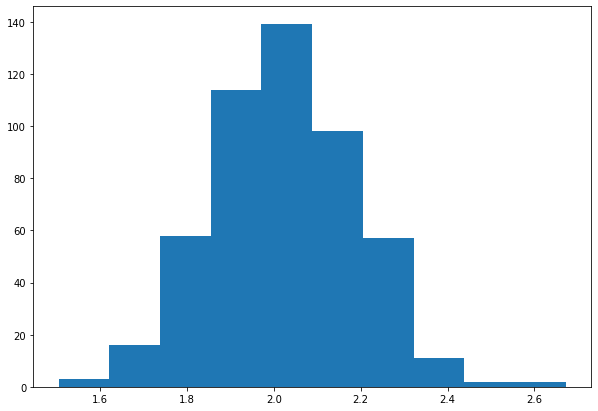

mean: 2.023556966320744
standard deviation: 0.16875273752563802


In [46]:
#step 6 - densilty of beat1_hat

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(beta1_hat)
plt.show()

counts, bins = np.histogram(beta1_hat)
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts/np.sum(counts)

mean = np.sum(probs*mids)
sd = np.sqrt(np.sum(probs*(mids-mean)**2))

print("mean:", mean)
print("standard deviation:", sd)

In [47]:
#step 7
import statistics

mean = np.mean(beta1_hat)
std = statistics.variance(beta1_hat)**0.5

lb = mean-std
ub = mean+std

filtered_list = list(filter(lambda t: t>=lb and t<ub, beta1_hat))
print(len(filtered_list)/len(beta1_hat))

lb = mean-2*std
ub = mean+2*std

filtered_list = list(filter(lambda t: t>=lb and t<ub, beta1_hat))
print(len(filtered_list)/len(beta1_hat))

0.68
0.966


In [48]:
# step 8 - repeat 4 to 6 with sample size 20

idx_20 = []
X_20 = []
Y_20 = []
for i in range (20):
  idx = random.randint(0,999)
  idx_20.append(idx)
  X_20.append(X[idx])
  Y_20.append(Y[idx])

X_20 = sm.add_constant(X_20)
result = sm.OLS(Y_20, X_20).fit()

beta1_hat_20 = []
for s in range(500):
  idx_20 = []
  X_20 = []
  Y_20 = []
  for i in range (20):
    idx = random.randint(0,999)
    idx_20.append(idx)
    X_20.append(X[idx])
    Y_20.append(Y[idx])

  X_20 = sm.add_constant(X_20)
  result_20 = sm.OLS(Y_20, X_20).fit()
  beta1_hat_20.append(result_20.params[1])

print(sum(beta1_hat_20)/len(beta1_hat_20))

2.051147062295078


In [49]:
# step 8 - repeat 4 to 6 with sample size 50

idx_50 = []
X_50 = []
Y_50 = []
for i in range (50):
  idx = random.randint(0,999)
  idx_50.append(idx)
  X_50.append(X[idx])
  Y_50.append(Y[idx])

X_50 = sm.add_constant(X_50)
result = sm.OLS(Y_50, X_50).fit()

beta1_hat_50 = []
for s in range(500):
  idx_50 = []
  X_50 = []
  Y_50 = []
  for i in range (50):
    idx = random.randint(0,999)
    idx_50.append(idx)
    X_50.append(X[idx])
    Y_50.append(Y[idx])

  X_50 = sm.add_constant(X_50)
  result_50 = sm.OLS(Y_50, X_50).fit()
  beta1_hat_50.append(result_50.params[1])

print(sum(beta1_hat_50)/len(beta1_hat_50))

2.0293673263765926


In [53]:
# step 8 - repeat 4 to 6 with sample size 70

idx_70 = []
X_70 = []
Y_70 = []
for i in range (70):
  idx = random.randint(0,999)
  idx_70.append(idx)
  X_70.append(X[idx])
  Y_70.append(Y[idx])

X_70 = sm.add_constant(X_70)
result = sm.OLS(Y_70, X_70).fit()

beta1_hat_70 = []
for s in range(500):
  idx_70 = []
  X_70 = []
  Y_70 = []
  for i in range (70):
    idx = random.randint(0,999)
    idx_70.append(idx)
    X_70.append(X[idx])
    Y_70.append(Y[idx])

  X_70 = sm.add_constant(X_70)
  result_70 = sm.OLS(Y_70, X_70).fit()
  beta1_hat_70.append(result_70.params[1])

print(sum(beta1_hat_70)/len(beta1_hat_70))

2.0259233960359055


In [51]:
#step 9
import statistics
y_med = statistics.median(Y)
x_med = statistics.median(X)

y0_hat = []
y1_hat = []
x1_hat = []
x0_hat = []
for i in range(100):
  if(X[i] >= x_med):
    x1_hat.append(X[i])
  else:
    x0_hat.append(X[i])

  if(Y[i] >= y_med):
    y1_hat.append(Y[i])
  else:
    y0_hat.append(Y[i])

x0 = sum(x0_hat)/len(x0_hat) 
x1 = sum(x1_hat)/len(x1_hat)
y0 = sum(y0_hat)/len(y0_hat)
y1 =sum(y1_hat)/len(y1_hat)

beta1_cap = (y1-y0)/(x1-x0)
print(beta1_cap)

2.3549371064046727


**Question 1.1**

This is a mathematical technique, which is used to estimate the poissible outcomes of an uncertain event. We are trying to extimate beta1(slope) of linear regression. Simulation is helping with both an understanding of the analytically dervied means and variances of regression estimaters and the intution of sampling distribution.

It gives a clearer understanding of the beahviour of OLS estimaters.

**Question 1.2**

beta1_hat = 2.02

beta1 = 1.91

I have taken my initial beata as 2 and when i am reapeating the experiment 500 times then I am getting beta1_hat which is really close to beta1. But when I am running it once it is 1.91; not that close.

So, if an experiment is repeated many times than it will give better result (given same sample size).

**Question 1.3**

beta1 when sample size is 20 = 2.05
beta1 when sample size is 50 = 2.029
beta1 when sample size is 70 = 2.025

So, we can clearly see that when I am incresing the sample size the beta1 value is getting more accurate. It is getting close to 2 which is actual beta1 value.